In [1]:
import uproot as up
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import moyal


pęd poprzeczny:
p_t = p * sin(theta)

In [2]:
data = up.open('Velo_TrackMonitor_g4.root')['my_ttree']
pd.DataFrame(np.reshape(np.array(data.keys()), (18,4)))

,0,1,2,3
0,run,evt,evTimeSec,pvx
1,pvy,pvz,npv,pvchi2
2,pvndof,pvntr,nbacktr,ndof
3,chi2,theta,slx,sly
4,nhitsr,nhitsl,p,type
5,pitch,clSize,adcsum,station
6,sensnum,pntx,pnty,pntz
7,pntr,pntphi,pntr_loc,pntphi_loc
8,projectedAngle,rho,rhostrip,rhotrack
9,reso,res,res_x,res_y


In [19]:
df = pd.DataFrame({
    'theta': data['theta'].arrays(library = 'np')['theta'],
    'momentum': data['p'].arrays(library = 'np')['p'],
    'eta': data['eta_mc'].arrays(library = 'np')['eta_mc'],
    'sensnum': data['sensnum'].arrays(library = 'np')['sensnum'],
    'reso': data['reso'].arrays(library = 'np')['reso'],
    'adcsum': data['adcsum'].arrays(library = 'np')['adcsum'],
    'clSize': data['clSize'].arrays(library = 'np')['clSize'],
    'partEnergy_mc': data['partEnergy_mc'].arrays(library = 'np')['partEnergy_mc'],
    'PID_mc': data['PID_mc'].arrays(library='np')['PID_mc']
})

In [4]:
# plt.hist(np.sqrt(np.power(data['pnty'].arrays(library = 'np')['pnty'],2) + np.power(data['pntx'].arrays(library = 'np')['pntx'],2)))

Text(0.5, 0, 'theta')

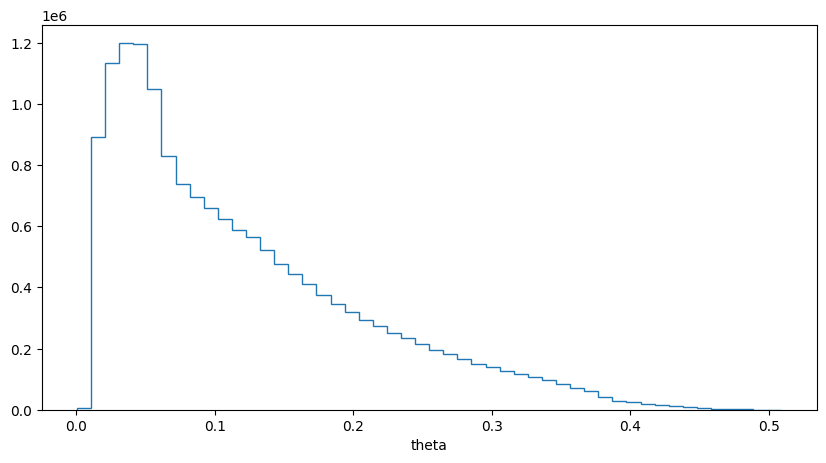

In [5]:
plt.figure(figsize=(10,5))
plt.hist(df['theta'],bins=50, histtype='step')
plt.xlabel('theta')

Text(0.5, 0, 'momentum')

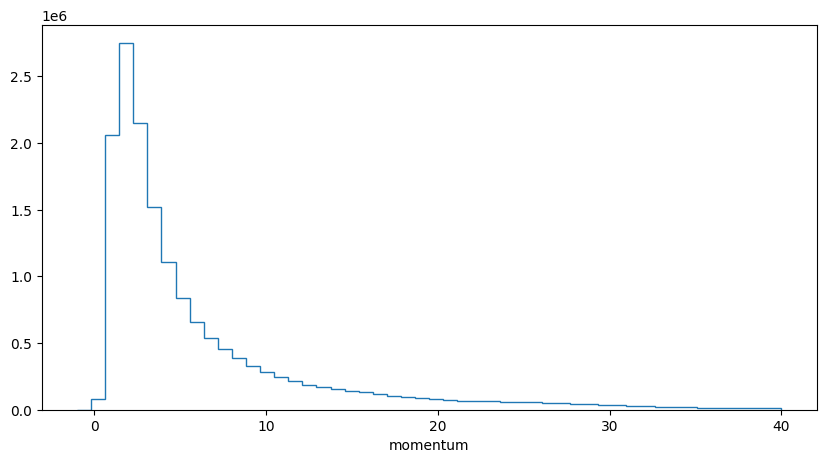

In [6]:
plt.figure(figsize=(10,5))
plt.hist(df['momentum'],bins=50, range=(-1,40), histtype='step')
plt.xlabel('momentum')

Text(0.5, 0, 'eta')

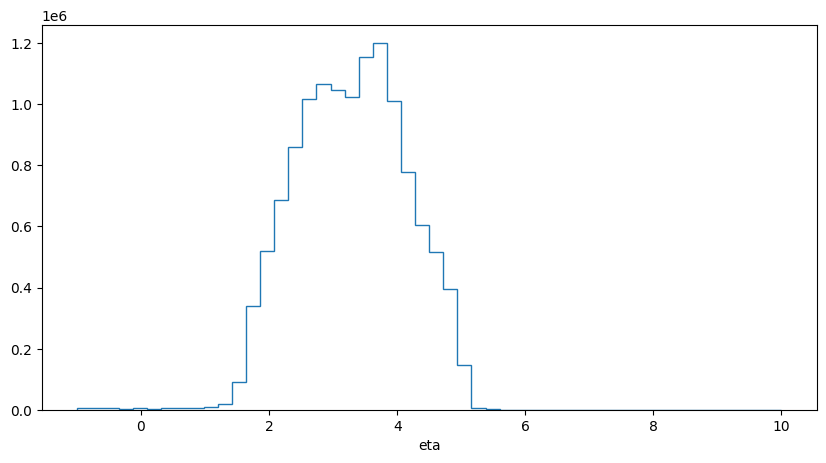

In [7]:
plt.figure(figsize=(10,5))
plt.hist(df['eta'],bins=50, range=(-1,10), histtype='step')
plt.xlabel('eta')

Text(0.5, 0, 'eta from theta')

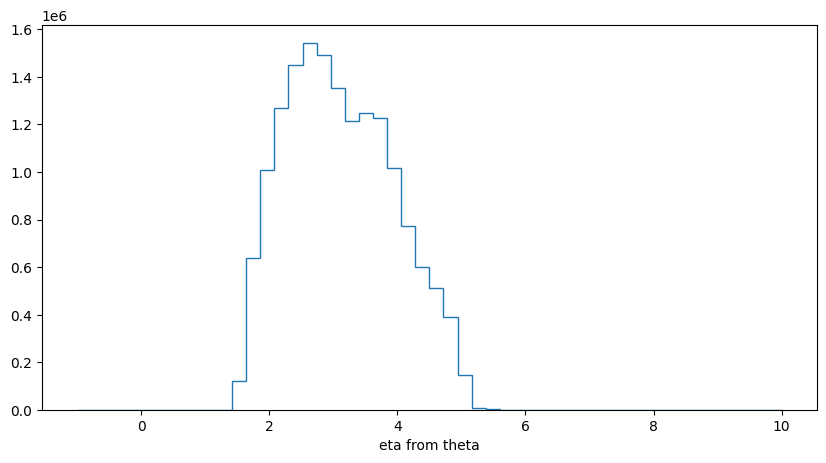

In [8]:
plt.figure(figsize=(10,5))
plt.hist(-np.log(df['theta']/2),bins=50, range=(-1,10), histtype='step')
plt.xlabel('eta from theta')
# plt.plot(-np.log(theta/2))

Text(0.5, 0, 'eta')

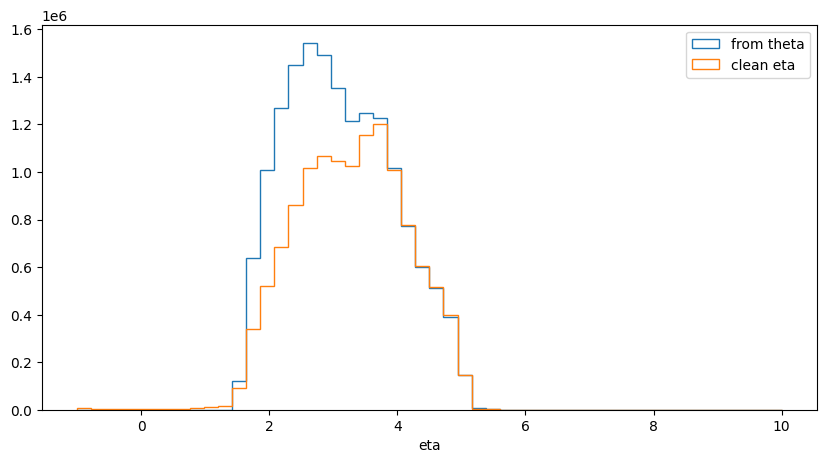

In [9]:
plt.figure(figsize=(10,5))
plt.hist(-np.log(df['theta']/2),bins=50, range=(-1,10), histtype='step', label='from theta')
plt.hist(df['eta'],bins=50, range=(-1,10), histtype='step', label='clean eta')
plt.legend()
plt.xlabel('eta')

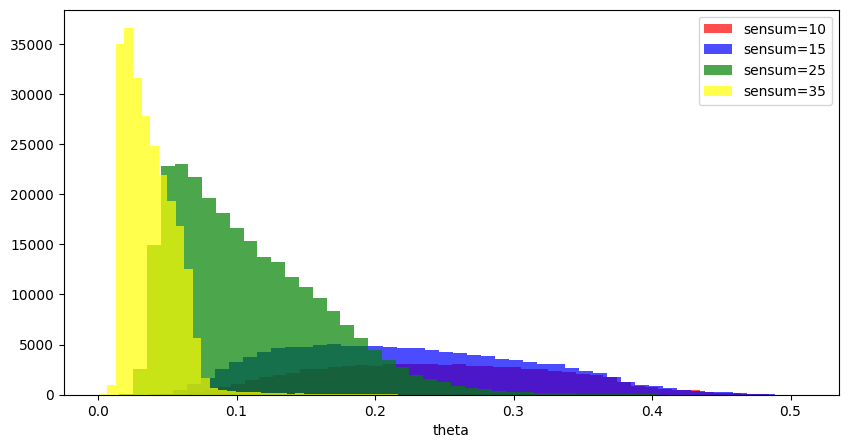

In [10]:
plt.figure(figsize=(10,5))
plt.hist(df.drop(df[df['sensnum'] != 10].index)['theta'], bins=50, alpha=0.7, label='sensum=10', color='red')
plt.hist(df.drop(df[df['sensnum'] != 15].index)['theta'], bins=50, alpha=0.7, label='sensum=15', color='blue')
plt.hist(df.drop(df[df['sensnum'] != 25].index)['theta'], bins=50, alpha=0.7, label='sensum=25', color='green')
plt.hist(df.drop(df[df['sensnum'] != 35].index)['theta'], bins=50, alpha=0.7, label='sensum=35', color='yellow')
plt.xlabel('theta')
plt.legend()

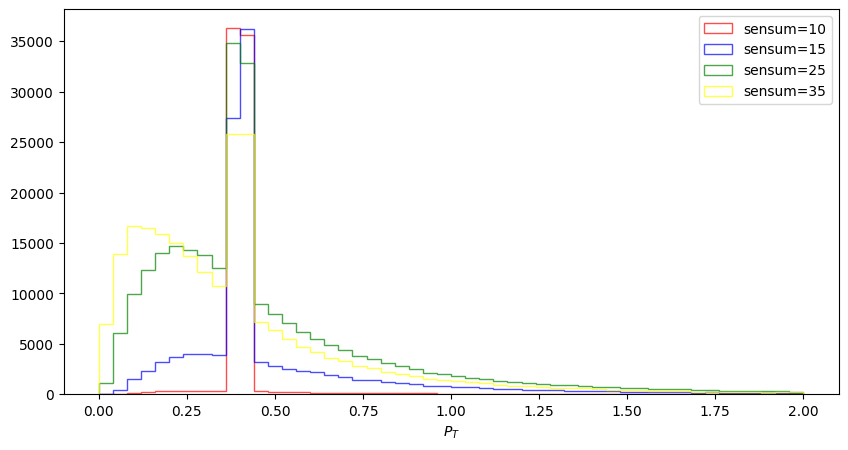

In [11]:
plt.figure(figsize=(10,5))
plt.hist(df.drop(df[df['sensnum'] != 10].index)['momentum']*np.sin(df.drop(df[df['sensnum'] != 10].index)['theta']), bins=50,histtype='step', alpha=0.7,range=(-0,2), label='sensum=10', color='red')
plt.hist(df.drop(df[df['sensnum'] != 15].index)['momentum']*np.sin(df.drop(df[df['sensnum'] != 15].index)['theta']), bins=50,histtype='step', alpha=0.7,range=(-0,2), label='sensum=15', color='blue')
plt.hist(df.drop(df[df['sensnum'] != 25].index)['momentum']*np.sin(df.drop(df[df['sensnum'] != 25].index)['theta']), bins=50,histtype='step', alpha=0.7,range=(-0,2), label='sensum=25', color='green')
plt.hist(df.drop(df[df['sensnum'] != 35].index)['momentum']*np.sin(df.drop(df[df['sensnum'] != 35].index)['theta']), bins=50,histtype='step', alpha=0.7,range=(-0,2), label='sensum=35', color='yellow')
plt.xlabel('$P_T$')
plt.legend()

Text(0.5, 0, 'residua')

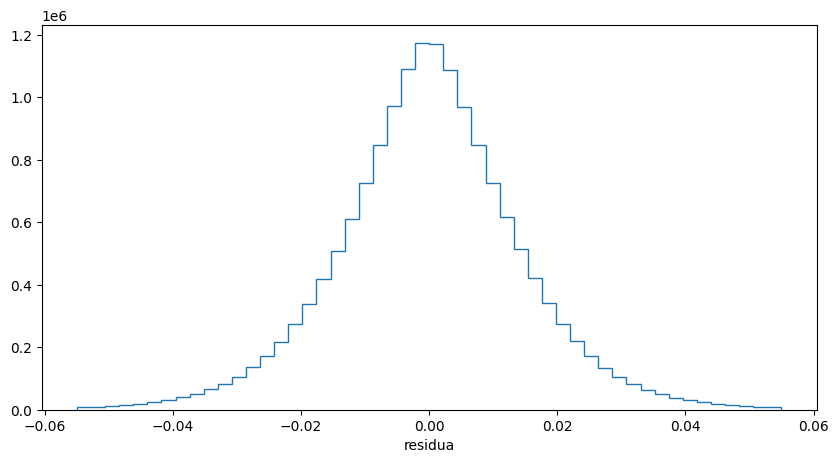

In [12]:
plt.figure(figsize=(10,5))
plt.hist(df['reso'],bins=50, range=(-0.055,0.055), histtype='step')
plt.xlabel('residua')
# dopasować gaussa

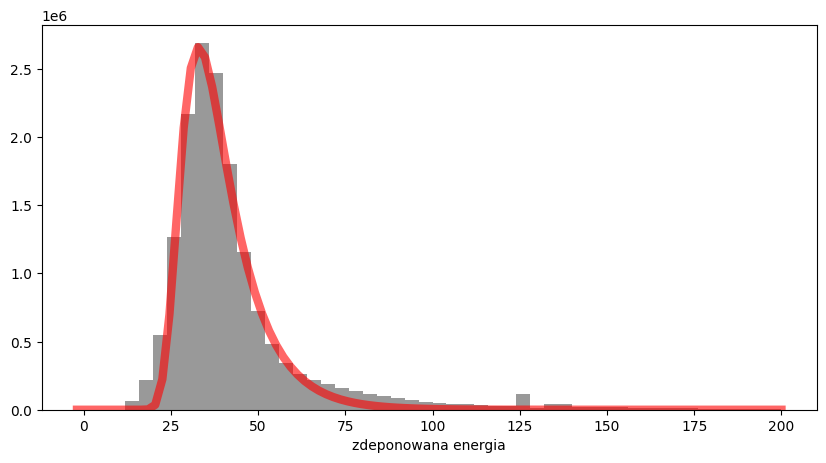

In [13]:
plt.figure(figsize=(10,5))
plt.hist(df['adcsum'],bins=50, range=(0,200), color='grey', alpha=0.8)
plt.xlabel('zdeponowana energia')

mean, var, skew, kurt = moyal.stats(moments='mvsk')
x = np.linspace(moyal.ppf(0.01), 200, 100)
plt.plot(x, moyal.pdf(x, 33, 5)*5.5*1e7, 'r-', lw=6, alpha=0.6, label='moyal pdf')

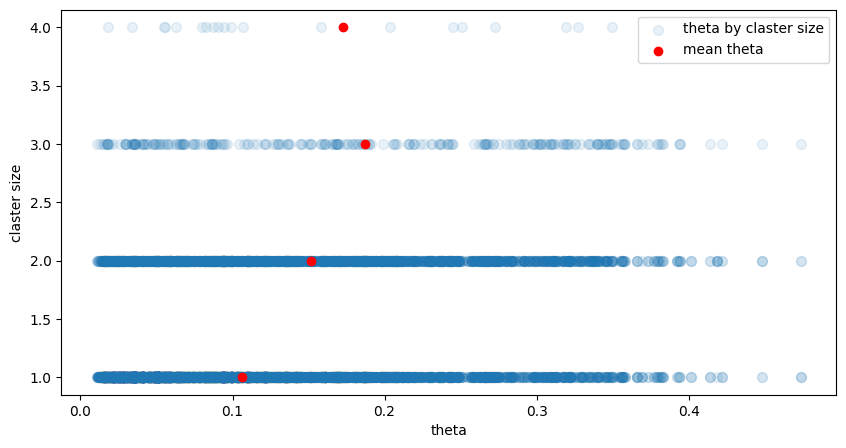

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(df['theta'][:10000],df['clSize'][:10000],s=50,alpha=0.1,label='theta by claster size')
plt.xlabel('theta')
plt.ylabel('claster size')

mean_theta = []
mean_theta.append(np.mean(df.drop(df[df['clSize'] != 1].index)['theta']))
mean_theta.append(np.mean(df.drop(df[df['clSize'] != 2].index)['theta']))
mean_theta.append(np.mean(df.drop(df[df['clSize'] != 3].index)['theta']))
mean_theta.append(np.mean(df.drop(df[df['clSize'] != 4].index)['theta']))

plt.scatter(mean_theta,[1,2,3,4],color='red',label='mean theta')
plt.legend()

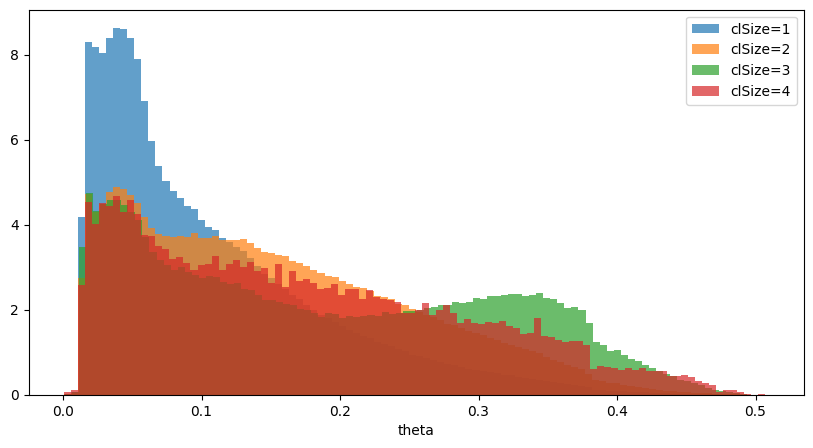

In [15]:
plt.figure(figsize=(10,5))
plt.hist(df.drop(df[df['clSize'] != 1].index)['theta'], bins=100, alpha=0.7, label='clSize=1', density=True)
plt.hist(df.drop(df[df['clSize'] != 2].index)['theta'], bins=100, alpha=0.7, label='clSize=2', density=True)
plt.hist(df.drop(df[df['clSize'] != 3].index)['theta'], bins=100, alpha=0.7, label='clSize=3', density=True)
plt.hist(df.drop(df[df['clSize'] != 4].index)['theta'], bins=100, alpha=0.7, label='clSize=4', density=True)
plt.xlabel('theta')
plt.legend()

## Projekt

Text(0, 0.5, 'deposited energy')

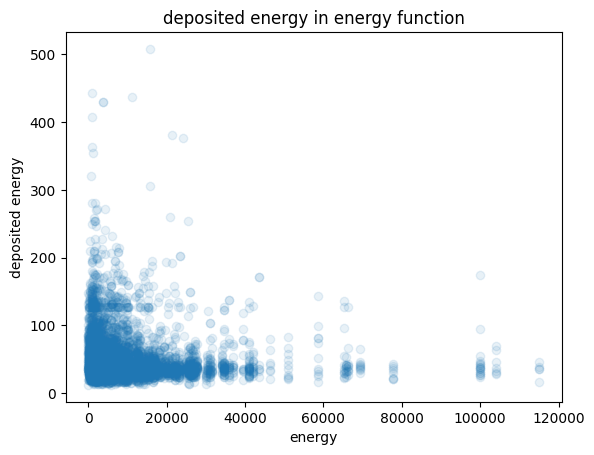

In [18]:
plt.figure(figsize=(10,5))
plt.scatter(df['partEnergy_mc'][:10000],df['adcsum'][:10000],alpha=0.1)
plt.title('deposited energy in energy function')
plt.xlabel('energy')
plt.ylabel('deposited energy')

Text(0.5, 0, 'Particle IDentification')

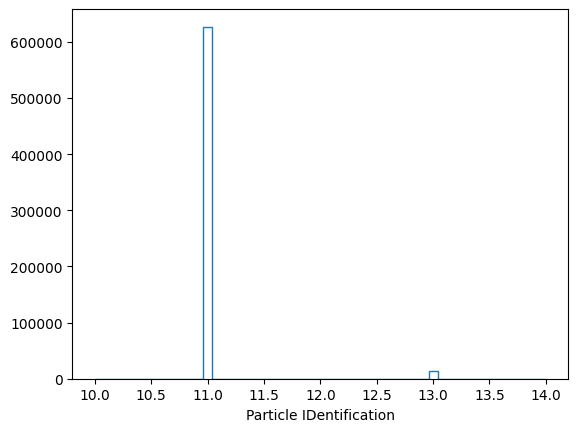

In [29]:
plt.figure(figsize=(10,5))
plt.hist(df['PID_mc'],bins=50, range=(10,14), histtype='step')
plt.xlabel('Particle IDentification')


##### kożystając z Particle Data Group - detektor rejestruje głównie elektrony (11) oraz μ− (13)
Sprawdźmy czy ma to wpływ na deponowaną energię

C:\Users\malcz\AppData\Local\Temp\ipykernel_25896\2152312163.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.scatter(df.drop(df[df['PID_mc'] != 11].index)['partEnergy_mc'][:100000],df.drop(df[df['PID_mc'] != 11].index)['adcsum'][:100000],color = 'red', alpha=0.01)
C:\Users\malcz\AppData\Local\Temp\ipykernel_25896\2152312163.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.scatter(df.drop(df[df['PID_mc'] != 13].index)['partEnergy_mc'][:100000],df.drop(df[df['PID_mc'

Text(0, 0.5, 'deposited energy')

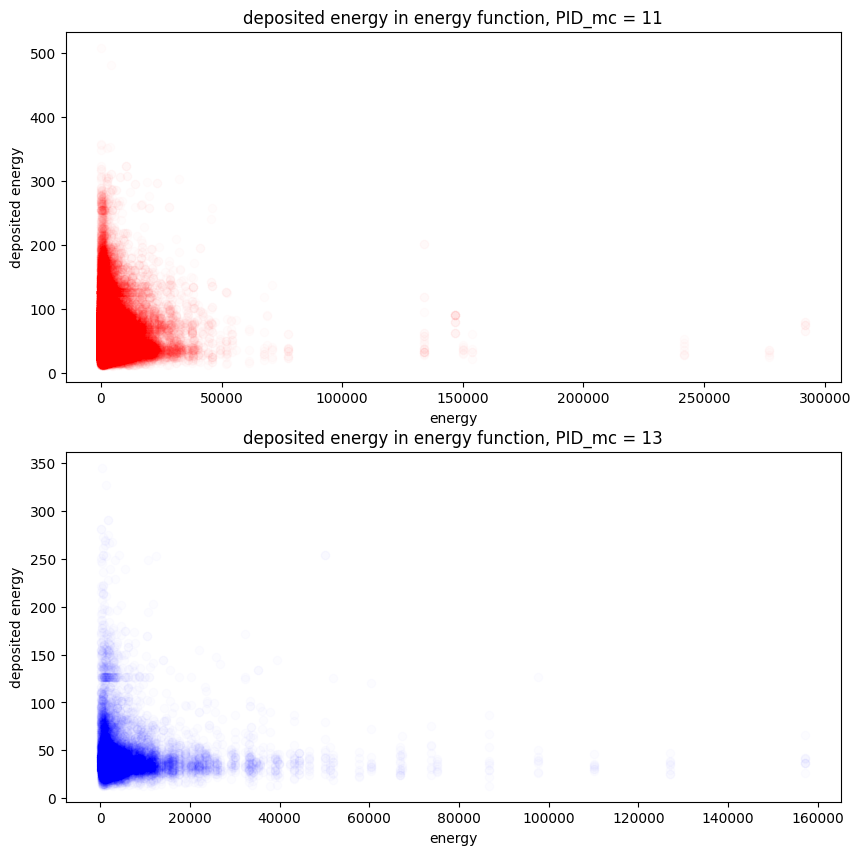

In [126]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.scatter(df.drop(df[df['PID_mc'] != 11].index)['partEnergy_mc'][:100000],df.drop(df[df['PID_mc'] != 11].index)['adcsum'][:100000],color = 'red', alpha=0.01)
plt.title('deposited energy in energy function, PID_mc = 11')
plt.xlabel('energy')
plt.ylabel('deposited energy')
plt.subplot(2,1,2)
plt.scatter(df.drop(df[df['PID_mc'] != 13].index)['partEnergy_mc'][:100000],df.drop(df[df['PID_mc'] != 13].index)['adcsum'][:100000],color = 'blue', alpha=0.01)
plt.title('deposited energy in energy function, PID_mc = 13')
plt.xlabel('energy')
plt.ylabel('deposited energy')

##### Powyższe wykresy mają podobe charakterystyki, dlatego trudno rozróżnić która cząstka deponuje energię

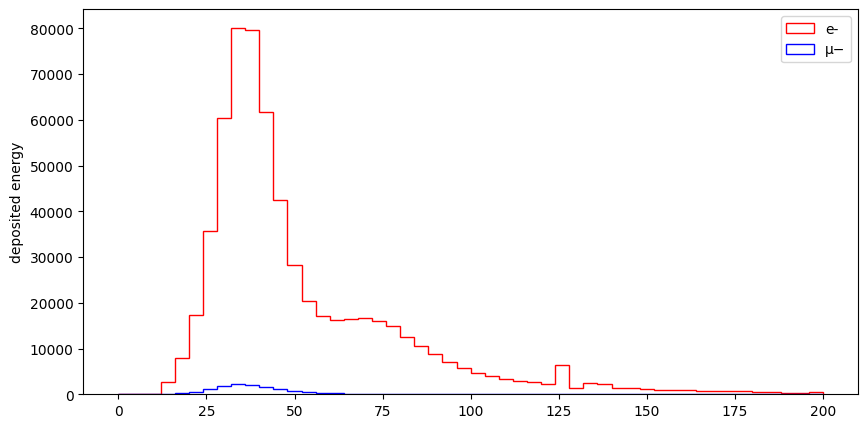

In [44]:
plt.figure(figsize=(10,5))
plt.hist(df.drop(df[df['PID_mc'] != 11].index)['adcsum'],bins = 50, range=(0,200), label='e-', color = 'red',histtype='step')
plt.hist(df.drop(df[df['PID_mc'] != 13].index)['adcsum'],bins = 50, range=(0,200), label='μ−', color = 'blue',histtype='step')
plt.xlabel('deposited energy')
plt.legend()

##### Jeżeli cząsta ma deponuje energie ponad 60 keV możemy identyfikować ją jako μ−, sam stosunek energii zdeponowanej do energii cząstki nie wystarcza

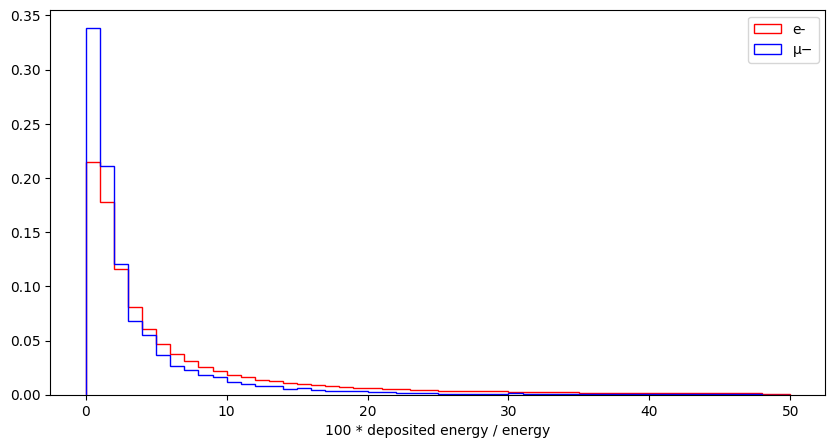

In [48]:
plt.figure(figsize=(10,5))
plt.hist(df.drop(df[df['PID_mc'] != 11].index)['adcsum'] / df.drop(df[df['PID_mc'] != 11].index)['partEnergy_mc'] * 100, bins = 50, range=(0,50),density=True, label='e-', color = 'red',histtype='step')
plt.hist(df.drop(df[df['PID_mc'] != 13].index)['adcsum'] / df.drop(df[df['PID_mc'] != 13].index)['partEnergy_mc'] * 100, bins = 50, range=(0,50),density=True, label='μ−', color = 'blue',histtype='step')
plt.xlabel('100 * deposited energy / energy')
plt.legend()

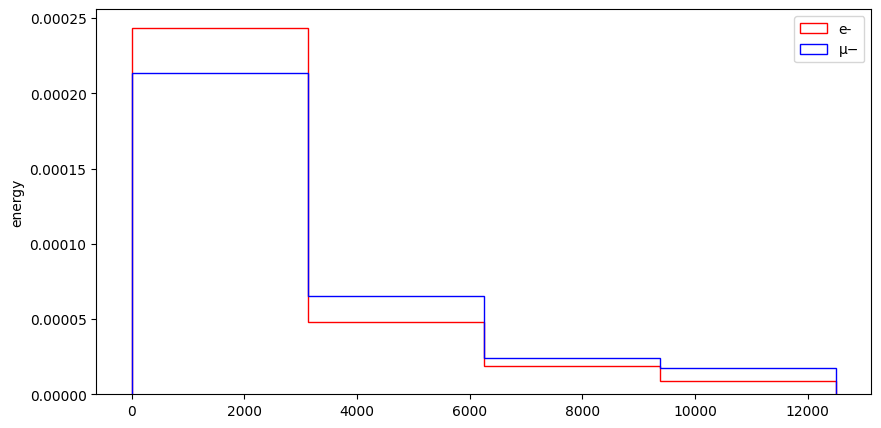

In [60]:
plt.figure(figsize=(10,5))
energy_bins_11 = plt.hist(df.drop(df[df['PID_mc'] != 11].index)['partEnergy_mc'],bins = 4, density=True, range=(0,12500), label='e-', color = 'red',histtype='step')
energy_bins_13 = plt.hist(df.drop(df[df['PID_mc'] != 13].index)['partEnergy_mc'],bins = 4, density=True, range=(0,12500), label='μ−', color = 'blue',histtype='step')
plt.ylabel('energy')
plt.legend()

In [82]:
energy_11 = df.drop(df[df['PID_mc'] != 11].index)
energy_13 = df.drop(df[df['PID_mc'] != 13].index)

energy_11_1 = energy_11.drop(energy_11[energy_11['partEnergy_mc'] > energy_bins_11[1][1]].index)
energy_11_2 = energy_11.drop(energy_11[energy_11['partEnergy_mc'] > energy_bins_11[1][2]].index)
energy_11_3 = energy_11.drop(energy_11[energy_11['partEnergy_mc'] > energy_bins_11[1][3]].index)
energy_11_4 = energy_11.drop(energy_11[energy_11['partEnergy_mc'] > energy_bins_11[1][4]].index)

energy_11_1 = energy_11_1.drop(energy_11_1[energy_11_1['partEnergy_mc'] < energy_bins_11[1][0]].index)
energy_11_2 = energy_11_2.drop(energy_11_2[energy_11_2['partEnergy_mc'] < energy_bins_11[1][1]].index)
energy_11_3 = energy_11_3.drop(energy_11_3[energy_11_3['partEnergy_mc'] < energy_bins_11[1][2]].index)
energy_11_4 = energy_11_4.drop(energy_11_4[energy_11_4['partEnergy_mc'] < energy_bins_11[1][3]].index)

energy_13_1 = energy_13.drop(energy_13[energy_13['partEnergy_mc'] > energy_bins_11[1][1]].index)
energy_13_2 = energy_13.drop(energy_13[energy_13['partEnergy_mc'] > energy_bins_11[1][2]].index)
energy_13_3 = energy_13.drop(energy_13[energy_13['partEnergy_mc'] > energy_bins_11[1][3]].index)
energy_13_4 = energy_13.drop(energy_13[energy_13['partEnergy_mc'] > energy_bins_11[1][4]].index)

energy_13_1 = energy_13_1.drop(energy_13_1[energy_13_1['partEnergy_mc'] < energy_bins_11[1][0]].index)
energy_13_2 = energy_13_2.drop(energy_13_2[energy_13_2['partEnergy_mc'] < energy_bins_11[1][1]].index)
energy_13_3 = energy_13_3.drop(energy_13_3[energy_13_3['partEnergy_mc'] < energy_bins_11[1][2]].index)
energy_13_4 = energy_13_4.drop(energy_13_4[energy_13_4['partEnergy_mc'] < energy_bins_11[1][3]].index)


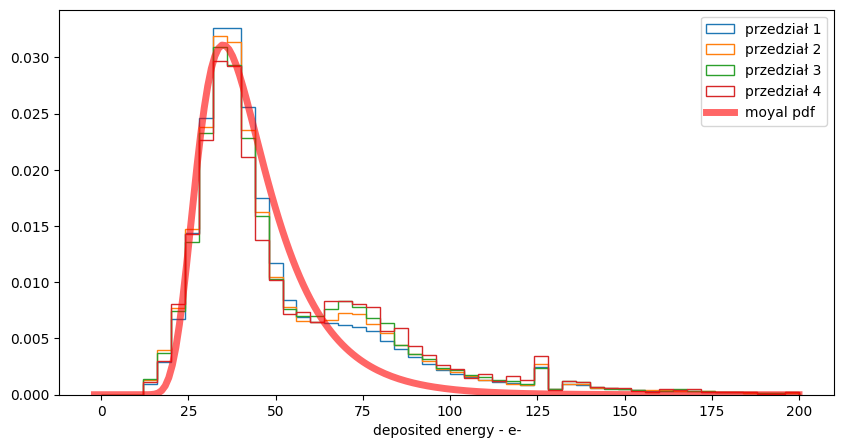

In [106]:
plt.figure(figsize=(10,5))
plt.hist(energy_11_1['adcsum'],bins = 50, range=(0,200), density=True, label='przedział 1',histtype='step')
plt.hist(energy_11_2['adcsum'],bins = 50, range=(0,200), density=True, label='przedział 2',histtype='step')
plt.hist(energy_11_3['adcsum'],bins = 50, range=(0,200), density=True, label='przedział 3',histtype='step')
plt.hist(energy_11_4['adcsum'],bins = 50, range=(0,200), density=True, label='przedział 4',histtype='step')
plt.xlabel('deposited energy - e-')

mean, var, skew, kurt = moyal.stats(moments='mvsk')
x = np.linspace(moyal.ppf(0.01), 200, 200)
plt.plot(x, moyal.pdf(x, 35, 7)*0.9, 'r-', lw=5, alpha=0.6, label='moyal pdf')
plt.legend()


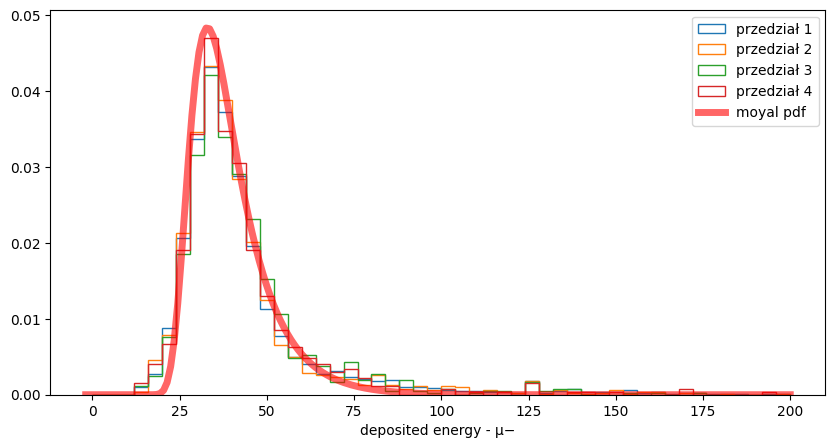

In [115]:
plt.figure(figsize=(10,5))
plt.hist(energy_13_1['adcsum'],bins = 50, range=(0,200), density=True, label='przedział 1',histtype='step')
plt.hist(energy_13_2['adcsum'],bins = 50, range=(0,200), density=True, label='przedział 2',histtype='step')
plt.hist(energy_13_3['adcsum'],bins = 50, range=(0,200), density=True, label='przedział 3',histtype='step')
plt.hist(energy_13_4['adcsum'],bins = 50, range=(0,200), density=True, label='przedział 4',histtype='step')
plt.xlabel('deposited energy - μ−')

mean, var, skew, kurt = moyal.stats(moments='mvsk')
x = np.linspace(moyal.ppf(0.01), 200, 200)
plt.plot(x, moyal.pdf(x, 33, 5), 'r-', lw=5, alpha=0.6, label='moyal pdf')
plt.legend()

Text(0, 0.5, 'deposited energy')

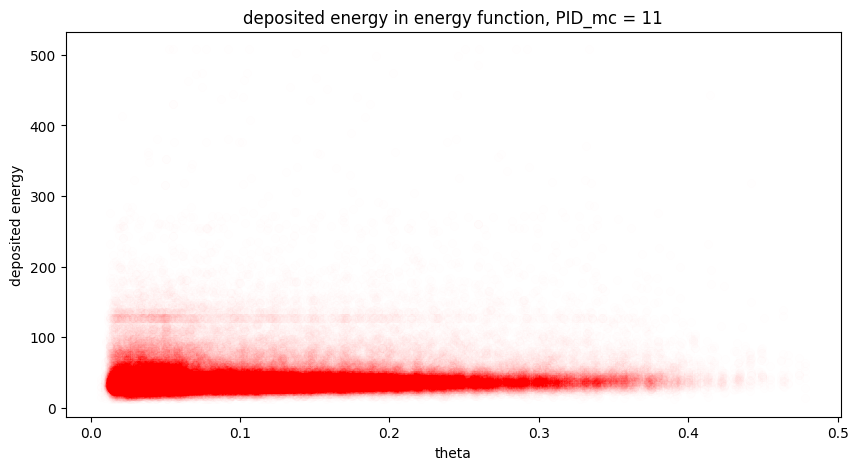

In [124]:
plt.figure(figsize=(10,5))
plt.scatter(df['theta'][:100000],df['adcsum'][:100000],color = 'red', alpha=0.004)
plt.title('deposited energy in energy function, PID_mc = 11')
plt.xlabel('theta')
plt.ylabel('deposited energy')

##### Możemy obserwować lekką zależność wzrostu deponowanej energii wraz z zwiększającym się kątem